In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc


In [5]:
data = pd.read_csv('./wine/wine.data', header=None)
data

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

In [8]:
data.columns = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash ',
                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data

Class  Alcohol  Malic acid   Ash  Alcalinity of ash   Magnesium  \
0        1    14.23        1.71  2.43                15.6        127   
1        1    13.20        1.78  2.14                11.2        100   
2        1    13.16        2.36  2.67                18.6        101   
3        1    14.37        1.95  2.50                16.8        113   
4        1    13.24        2.59  2.87                21.0        118   
..     ...      ...         ...   ...                 ...        ...   
173      3    13.71        5.65  2.45                20.5         95   
174      3    13.40        3.91  2.48                23.0        102   
175      3    13.27        4.28  2.26                20.0        120   
176      3    13.17        2.59  2.37                20.0        120   
177      3    14.13        4.10  2.74                24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [9]:
data.keys()

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [11]:
missing_values = data.isnull().sum()
missing_values

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<AxesSubplot:title={'center':'Analyze Correlation of Features'}>

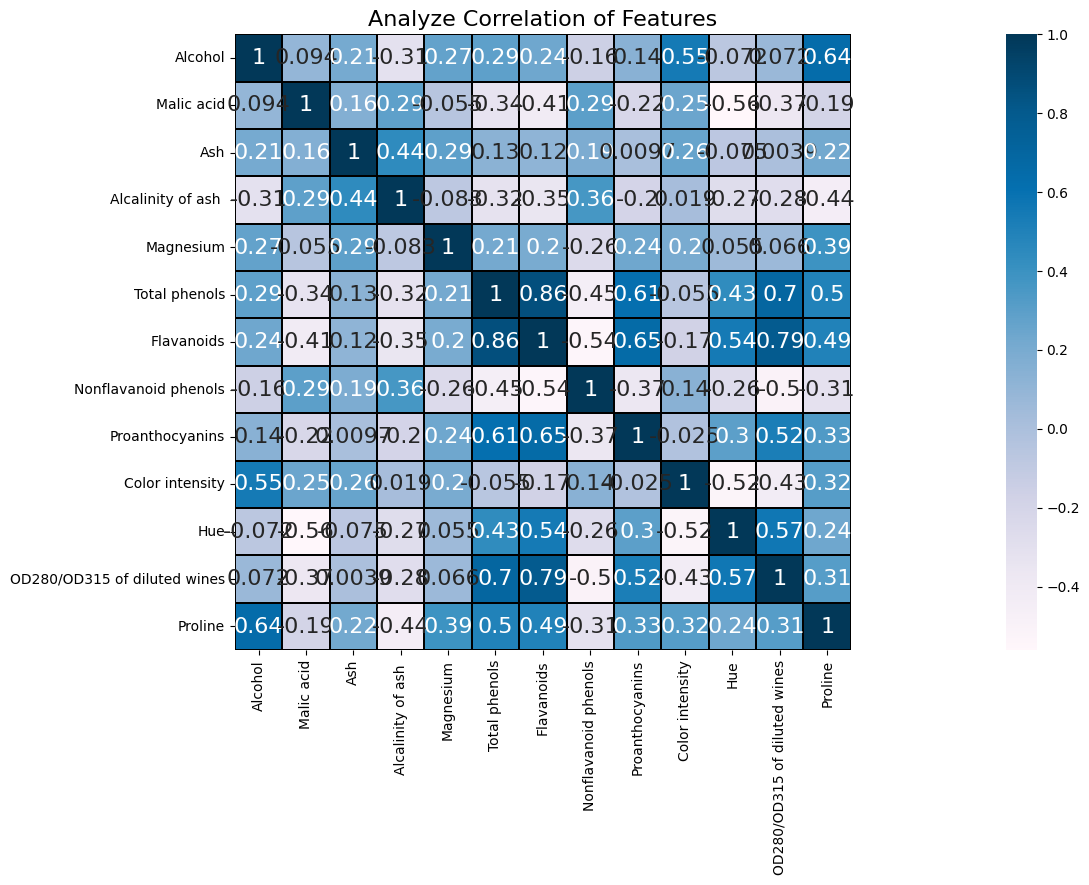

In [13]:
# heatmap
colormap = plt.cm.PuBu
plt.figure(figsize=(40, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(data.drop('Class', axis=1).astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})

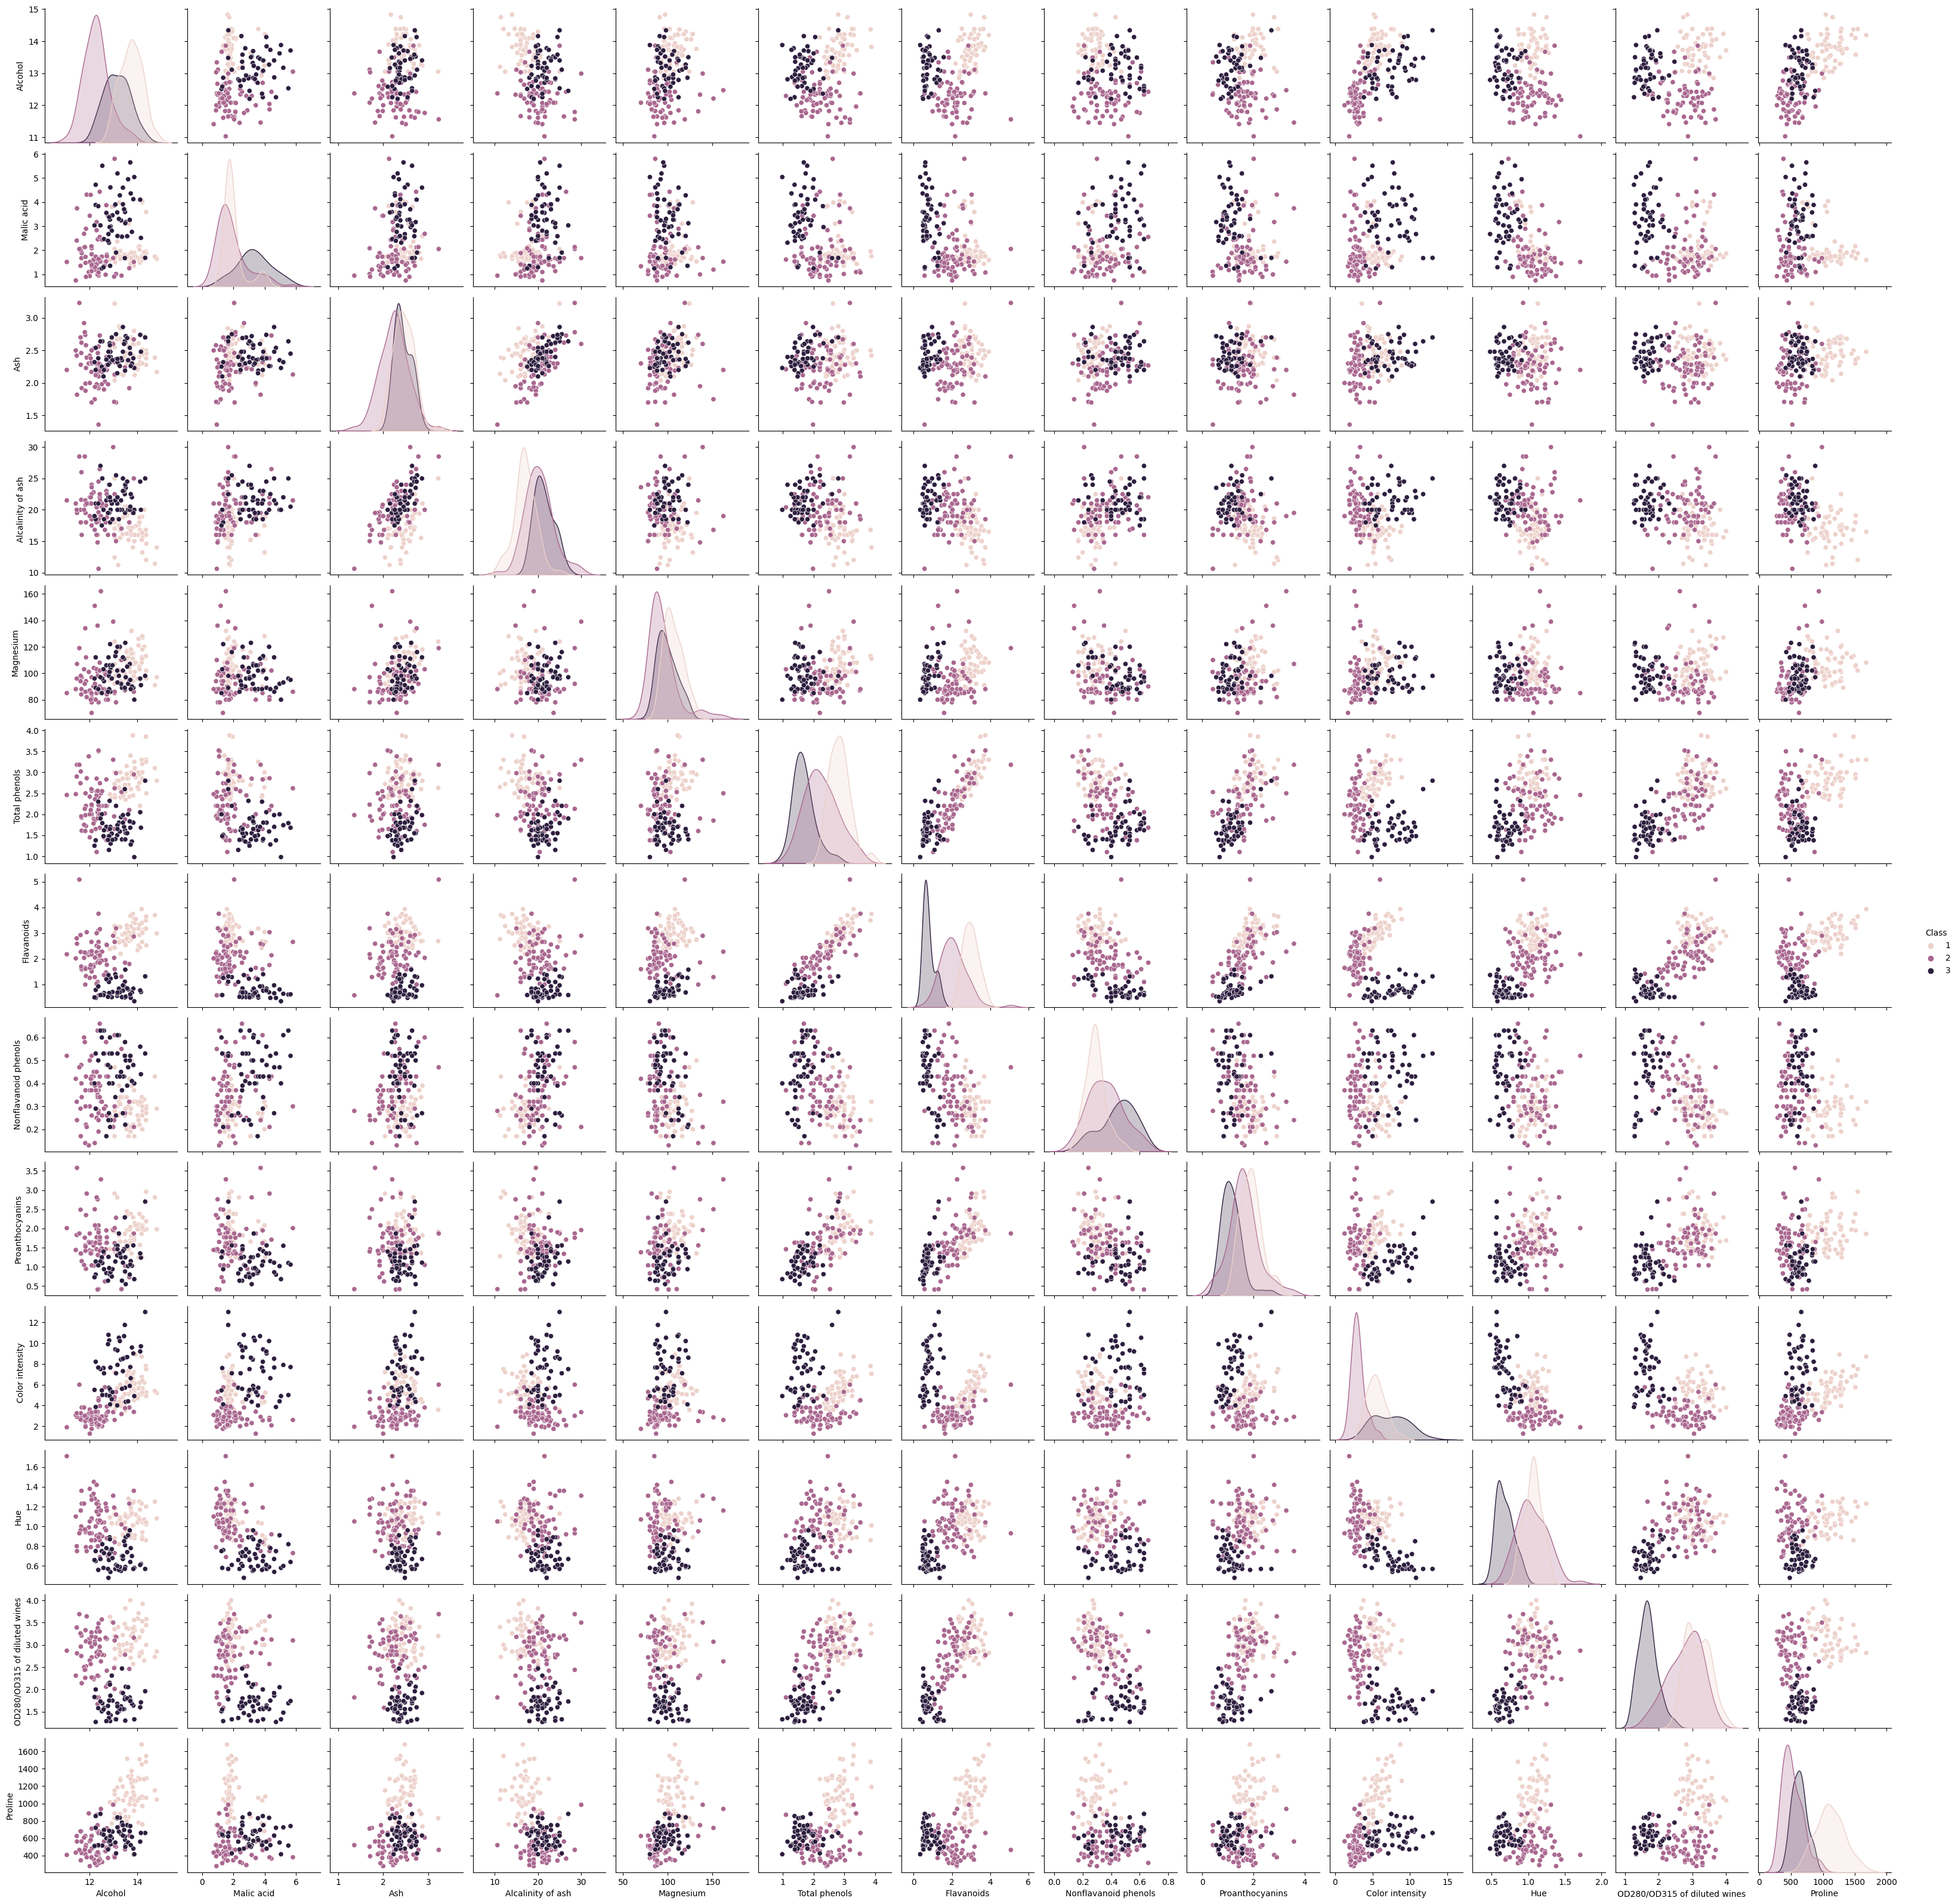

In [14]:
# pairplot
sns.pairplot(data,
             vars= data.drop('Class', axis=1).columns,
            hue ='Class')
plt.show()

In [24]:
def remove_outliers(df, threshold=3):
    """
    각 특성에서 이상치를 확인하고 제거하는 함수

    Parameters:
    - df (DataFrame): 이상치를 제거할 데이터프레임
    - threshold (int or float): 이상치를 판단하기 위한 임계값 (기본값: 3)

    Returns:
    - cleaned_df (DataFrame): 이상치가 제거된 데이터프레임
    """
    cleaned_df = df.copy()
    
    for column in df.columns:
        if column == "Class":
            continue  # "Class" 컬럼이면 건너뜁니다.
    
        if np.issubdtype(df[column].dtype, np.number):  # 숫자 타입인 열만 처리
            mean = df[column].mean()
            std = df[column].std()
            z_scores = (df[column] - mean) / std
            outliers = (z_scores.abs() > threshold)
            cleaned_df = cleaned_df[~outliers]

    
    return cleaned_df


In [26]:
cleaned_df = remove_outliers(data)
cleaned_df

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Class  Alcohol  Malic acid   Ash  Alcalinity of ash   Magnesium  \
0        1    14.23        1.71  2.43                15.6        127   
1        1    13.20        1.78  2.14                11.2        100   
2        1    13.16        2.36  2.67                18.6        101   
3        1    14.37        1.95  2.50                16.8        113   
4        1    13.24        2.59  2.87                21.0        118   
..     ...      ...         ...   ...                 ...        ...   
173      3    13.71        5.65  2.45                20.5         95   
174      3    13.40        3.91  2.48                23.0        102   
175      3    13.27        4.28  2.26                20.0        120   
176      3    13.17        2.59  2.37                20.0        120   
177      3    14.13        4.10  2.74                24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[168 rows x 14 columns]

In [27]:
X = cleaned_df.drop('Class', axis=1)
y = cleaned_df['Class']

In [28]:
# Z 점수 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Accuracy: 0.9411764705882353


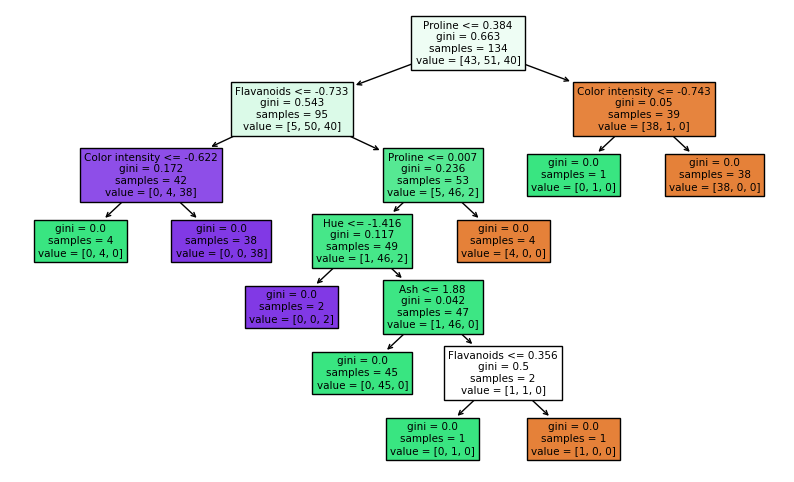

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

# 모델 성능 평가
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

plt.figure(figsize=(10, 6))
plot_tree(clf1, filled=True, feature_names=X.columns)
plt.show()

In [33]:
clf2 = SVC()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 1.0


In [35]:
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 1.0


In [39]:
clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 1.0
